# Домашнее задание №3. Линейная регрессия. Расширение признакового пространства. Регуляризация. Валидация

## Ф.И.О: Маслак Иван Александрович

### Описание.

Домашнее задание состоит из 2-х частей:
  - теоретическая часть
  - практическая часть
    - реализация модуля линейной регрессии
    -  эксперименты

**На проверку требуется отправить zip архив, который будет содержать следующие файлы:**
  - модуль ``modules`` с реализованными классами
  - заполненный блокнот в формате ``.ipynb``
  - заполненный блокнот в формате ``.html`` **(в jupyter: File -> Save and Export Notebook As -> HTML -> ...)**

-------------------------

## Теоретическая часть. (4 points)

**№1.** (2 point) Найдите субдифференциалы для следующих функций:
- $f(x) = \max(0, 1 − ax), \ \ a \ — \ const$,  во всех точках

Рассмотрим 3 случая:
- $a > 0$:
  - $1 - ax > 0$:
    $f(x) = 1 - ax$ - дифференцируема $\implies \partial f(x) = \{f'(x)\} = \{-a\}$;
  - $1 - ax < 0$:
     $f(x) = 0$ - дифференцируема $\implies \partial f(x) = \{f'(x)\} = \{0\}$;
  - $1 - ax < 0$:
    $f(x) = 0$, но производная справа равна 0, а слева - $-a$.

  Тогда при $x < \frac{1}{a}$
    $$ \partial f(x) = \{-a\} ;$$
    при $x > \frac{1}{a}$
    $$ \partial f(x) = \{0\} ;$$
    при $x = \frac{1}{a}$
    $$ \partial f(x) = [-a; 0] .$$
  Покажем корректность для случая $x = \frac{1}{a}$ для этого решим неравенство:

  $$ \forall x \in \mathbb{R}  \max(0, 1 - ax) \ge f(\frac{1}{a}) + z(x - \frac{1}{a}) = zx - \frac{z}{a} $$
  при $x < 1/a$:

  $$ 1 - ax \ge zx - \frac{z}{a} \iff -a(x - \frac{1}{a}) \ge z(x - \frac{1}{a}) $$
  Отсюда получаем
  $$ z \ge -a .$$
  при $x \ge 1/a$:
  $$ 0 \ge z(x - \frac{1}{a}) $$
  Отсюда $z \ge 0$
  
- $a = 0$:
  $f \equiv 1$ - дифференцируема в каждой точке, $\partial f(x) = \{0\}$

- $a < 0$:
  - $1 - ax > 0$:
    $f(x) = 1 - ax$ - дифференцируема $\implies \partial f(x) = \{f'(x)\} = \{-a\}$;
  - $1 - ax < 0$:
     $f(x) = 0$ - дифференцируема $\implies \partial f(x) = \{f'(x)\} = \{0\}$;
  - $1 - ax < 0$:
    $f(x) = 0$, но производная слева равна 0, а справа - $-a$.
    
    Тогда при $x > \frac{1}{a}$
    $$ \partial f(x) = \{-a\} ;$$
    при $x < \frac{1}{a}$
    $$ \partial f(x) = \{0\} ;$$
    при $x = \frac{1}{a}$
    $$ \partial f(x) = [0; -a] .$$

- $f(x) = \sin x, \ x \in [0; \frac{3}{2} \pi]$

Функция $\sin(x)$ дифференцируема на отрезке $(0; \frac{3}{2} \pi)$ и выпукла на отрезке. Тогда:
$$ \forall x \in (0; \frac{3}{2} \pi) :  \text{ } \partial f(x) = \{f'(x)\} = \{\cos (x)\} .$$
Отдельно нужно рассмотреть граничные точки:

- $x = 0$:
  $$ \forall x \in [0; \frac{3}{2} \pi] : \sin(x) \ge zx $$
  не существует таких $z$
- $x = \frac{3\pi}{2}$:
- $$ \forall x \in [0; \frac{3}{2} \pi] : \sin(x) \ge \sin \frac{3\pi}{2} + z(x - \frac{3\pi}{2}) \iff -\cos t \ge zt - 1, t = x - \frac{3\pi}{2}, t \in [-\frac{3\pi}{2}; 0] $$ 
  При $z \ge 0$:
  $$ zt - 1 \le -1 \le - \cos t .$$
  При $z < 0$ на заданном отрезке прямая $y = zt - 1$ имеет пересечения с $-\cos t$, либо проходит выше $\implies \exists t \in [-\frac{3\pi}{2}; 0] : -\cos t < zt - 1 $

   $$ 
   \text{Ответ: } \partial f(x) = 
   \begin{cases}
   \emptyset & x = 0 \\
   \{\cos x\} & x \in (0; \frac{3\pi}{2}) \\
   [0; +\infty] & x = \frac{3\pi}{2}
   \end{cases}
   $$

**№2.** (2 point) Рассмотрим задачу линейной регрессии с регуляризацией:

$$L(w) = \| Xw - y\|_2^2 + \lambda R(w)$$

И попробуем разобраться, в каких случаях возникает случай вырожденного (нулевого решения) для LASSO и Ridge регрессии.

- Покажите, что если оптимальное решение $w^*$ функционала $L(w) = \| Xw - y\|_2^2 + \lambda \|w\|_1$ равно нулю, то выполняется неравенство $\| 2 X^T y \|_{\infty} \le \lambda$.

В таком случае
$$
L(\omega^*) = \|y\|_2^2
$$
Функция потерь LASSO регрессии не является дифференцируемой, поэтому рассмотрим условие оптимальности в терминах субградиентов
$$
\partial L(\omega^*) = \nabla \|X\omega^* - y\|_2^2 + \lambda \partial \|\omega^*\|_1 
$$
Условие оптимальности: 0 принадлежит $\partial L(\omega^*)$

$$
\nabla \|X\omega^* y\|_2^2 = 2X^T X \omega^* - 2X^T y = -2X^Ty
$$

$$
\partial \|\omega\|_1(0) = \{ z \in \mathbb{R}^d | \forall i \le d : |z_i| \le 1 \} = \{\ z\in \mathbb{R}^d | \|z\|_\infty \le 1\} 
$$

Тогда $\exists z \in \partial \|\omega\|_1(0)$ такой, что
$$
0 = -2X^T y - \lambda z \iff 2X^T y = \lambda z \implies \|2X^T y\|_\infty = \| \lambda z\|_\infty = \lambda \|z\|_\infty \le \lambda
$$

- Покажите, что для функционала $L(w) = \| Xw - y\|_2^2 + \lambda \| w \|_2^2$ при $X^Ty \neq 0$ не существует $\lambda$ такого, что оптимальное решение $w^*$ обращается в нуль. 

Для Ridge Regression имеем
$$
\nabla L_2(\omega^*) = 2X^T X\omega^* - 2X^T y + 2 \lambda \omega^* = 0 \iff (X^TX + \lambda I)\omega^* = X^T y 
$$
Тогда, если $\omega ^* = 0$, то $0 = X^T y$ - противоречие. Значит не существует такого $\lambda$.

------------------------

## Практическая часть. (16 points)

Данная часть задания направлена на ознакомление с линейными моделями и градиентными методами обучения. В задании необходимо:
1. Написать на языке Python собственную реализацию модели линейной регрессии с произвольной функцией потерь и реализацию функции и градиента функции потерь для линейной регрессии. Реализации можно частично проверить через юнит-тесты (запускаются командой ``pytest tests.py``).
2. Провести описанные ниже эксперименты с модельными данными и приложенным датасетом.
3. Написать отчёт о проделанной работе (в формате jupyter notebook).

### Реализация алгоритмов. (3 points)

Везде под выборкой объектов будем понимать ``numpy.ndarray`` размера $N \times D$ или разреженную матрицу ``scipy.sparse.csr_matrix`` того же размера, под ответами для объектов выборки будем понимать ``numpy.ndarray`` размера $N$ , где $N$ — количество объектов в выборке, $D$ — размер признакового пространства. Подрузамевается, что первый столбец выборки объектов соответствует признаку для смещения и равен единице.

- **``losses.py``** (1 point)
  - класс в этом модуле задаёт конкретную функцию потерь, которую можно использовать для обучения линейной модели. Обратите внимание на то, что подсчёт всех функций может быть полностью векторизован (т.е. их можно реализовать без циклов). Предложенная в задании функция потерь должна поддерживать использование $l2$-регуляризации. Обратите внимание, что признак для смещения **не** должен учитываться в регуляризаторе.
  - Класс должен поддерживать как плотные матрицы (``numpy.ndarray``), так и разреженные матрицы (``scipy.sparse.csr_matrix``). Класс ``LinearLoss`` наследуется от абстрактного класса BaseLoss и реализует два метода: ``func`` и ``grad``.
    - ``func(self, X, y, w)`` — вычисление значения функции потерь на матрице признаков $X$, векторе ответов $y$ с вектором весов $w$.
    - ``grad(self, X, y, w)`` — вычисление значения градиента функции потерь на матрице признаков $X$, векторе ответов $y$ с вектором весов $w$.
  - У обоих методов одинаковые аргменты:
     - $X$ - выборка объектов
     - $y$ - вектор ответов
     - $w$ - вектор коэффициентов модели ``numpy.ndarray``.

В данном задании предлагается реализовать следующую функцию потерь:

$$L(X,y,w, \lambda) = \frac{1}{N} \| Xw - y \|_2^2 + \lambda \|w\|_2^2$$

- **``linear_model.py``** (2 points)
  - модуль с реализацией линейной модели, поддерживающей обучение через полный и стохастический градиентные спуски. Линейная модель должна задаваться в классе LinearModel. Параметр $\eta_k > 0$ — темп обучения (learning rate) для градиентного спуска, где $k$ — номер эпохи, должен параметризовываться формулой: $\eta_k = \dfrac{\alpha}{k^{\beta}}, \ где \ \ \alpha, \beta \ — \ \ заданные \ константы, \ \ k \ — \ \ номер \ итерации$

  - Описание методов класса:
    - ``__init__`` — конструктор (инициализатор) класса с параметрами:
      - ``loss_function`` — функция потерь, заданная классом, наследованным от ``BaseLoss``
      - ``batch_size`` — размер подвыборки, по которой считается градиент, если ``None``, то необходимо использовать полный градиент
      - ``step_alpha`` — параметр выбора шага градиентного спуска
      - ``step_beta`` — параметр выбора шага градиентного спуска
      - ``tolerance`` — точность, по достижении которой, необходимо прекратить оптимизацию.
        - **В данном случае в качестве критерия останова требуется реализовать вариант:** $\| w_{current} - w_{previous} \| \le tolerance$
      - ``max_iter`` — максимальное число итераций 
    - ``fit(self, X, y, w_0=None, trace=False)`` — обучение линейной модели:
      - ``X`` - выборка объектов
      - ``y`` - вектор ответов
      - ``w_0`` - начальное приближение вектора весов, если ``None``, то необходимо инициализировать внутри метода
      - ``trace`` - индикатор, нужно ли возвращать информацию об обучении
        - Если ``trace is True``, то метод должен вернуть словарь ``history``, содержащий информацию о поведении метода оптимизации во время обучения. Длина словаря ``history`` — количество эпох. Элементы словаря в случае полного градиентного спуска:
          - ``history[’time’]`` — содержит время потраченное на обучение каждой эпохи
          - ``history[’func’]`` — содержит значения функционала на обучающей выборке на каждой эпохе
          - ``history[’func_val’]`` — содержит значения функционала на валидационной выборке на каждой эпохе
        - Обратите внимание, что ``trace is True`` сильно замедляет обучение методов, т.к. требует в конце эпохи подсчитывать значение функции. Не используйте его ни в каких экспериментах, кроме экспериментов, где необходимо исследовать поведение функции в зависимости от гиперпараметров.
        - Нет необходимости проводить честное семплирование для каждого батча в методе стохасического градиентного спуска. Вместо этого предлагается в начале одной эпохи сгенерировать случайную перестановку индексов объектов, а затем последовательно выбирать объекты для нового батча из элементов этой перестановки.
    - ``predict(self, X)`` — получение предсказаний модели
      - ``X`` - выборка объектов
      - $\rightarrow$ Метод должен вернуть ``numpy.ndarray`` такого же размера, как и первая размерность матрицы ``X``.
    - ``get_objective(self, X, y)`` — вычисление значения функции потерь
      - ``X`` - выборка объектов
      - ``y`` - вектор ответов
      - $\rightarrow$ Функция должна вернуть вещественное число.
    - ``get_weights(self)`` — получить вектор линейных коэффициентов модели

--------------------------

### Эксперименты. (13 points)

Данные для этого задания находятся в файле ``hw2_data.csv``. Данные состоят из двух колонок: ``text`` и ``y``. Текст представляет собой комментарии пользователей. А целевая переменная, колонка ``y``, отражает степень токсичности комментария, которую вам необходимо будет предсказать.

**1.** (2 points)

*1.1* Произведите предварительную обработку текста. Приведите все тексты к нижнему регистру. Замените в тексте все символы, не являющиеся буквами и цифрами, на пробелы. Примените алгоритм [лемматизации](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BC%D0%BC%D0%B0%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F) (например, [WordNetLemmatizer](https://www.nltk.org/api/nltk.stem.WordNetLemmatizer.html?highlight=wordnet) из библотеки [nltk](https://www.nltk.org/index.html)) к коллекции. Удалите из текста стоп-слова (например, используя список стоп-слов из nltk).

Замечание. Полезные функции: ``str.lower``, ``str.split``, ``str.isalnum``, ``re.sub``, ``re.split``.

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import time

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/ivan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ivan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('hw2_data.csv')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()

    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    words = text.split()

    processed_words = []
    for word in words:
        lemma = lemmatizer.lemmatize(word)
        if lemma not in stop_words and len(lemma) > 1:
            processed_words.append(lemma)
    
    processed_text = ' '.join(processed_words)
    
    return processed_text

df['processed_text'] = df['text'].apply(preprocess)
df

,text,y,processed_text
0,oh why dear johnny boy part one again do you w...,2.076477,oh dear johnny boy part one want fucking fight...
1,savant13 is a fat shite,3.580757,savant13 fat shite
2,i am english i am i do not want to get blocked...,0.805528,english want get blocked fu
3,and why the fuck should i care g e t r i d o f...,4.582293,fuck care ck
4,yo dear sir james paul you a fruity ass nigga ...,2.077456,yo dear sir james paul fruity nigga get life m...
...,...,...,...
47986,bullshit anon you don t quarter civilian troop...,1.004520,bullshit anon quarter civilian troop area viol...
47987,q 10 okay is it to jesus call bastard course o...,1.013754,10 okay jesus call bastard course
47988,are a you fucking bitch bitch,0.998662,fucking bitch bitch
47989,life s a so bitch i am,1.004691,life bitch


*1.2.* Разделите данные на обучение, валидацию и тест. Для теста выберете $30\%$ __случайных__ объектов из датасета. Оставшиеся данные разбейте в соотношении $70/30$ (обучение/валидация). Рекомендуется использовать функцию ``sklearn.model_selection.train_test_split`` c параметром ``random_state=42``.

In [4]:
X_tmp, X_test, y_tmp, y_test = train_test_split(
    df['processed_text'], df['y'], test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_tmp, y_tmp, test_size=0.3, random_state=42)

*1.3.* Преобразуйте текст в разреженную матрицу ``scipy.sparse.csr_matrix``, где значение $x$ в позиции $(i, j)$ сответствует [$tf-idf$](https://ru.wikipedia.org/wiki/TF-IDF) характеристке $j$-го слова в $i$-ом документе. Рекомендуется использовать конструктор [``sklearn.feature_extraction.text.TfidfVectorizer``](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Добавьте в данные единичный столбец на нулевой позиции.

Замечание 1. У ``TfidfVectorizer`` есть несколько методов для работы, используйте ``fit_transform`` и ``fit`` для обучающей выборки, используйте ``transform`` для тестовой.

Замечание 2. Используйте параметр ``min_df``, чтобы уменьшить размерность данных и ускорить проведение экспериментов. Рекомендуется использовать ``min_df`` не меньше 5.

Замечание 3. Для добавления единичного столбца, можно воспользоваться следующей инструкцией: ``from scipy.sparse import hstack, csr_matrix
X = csr_matrix(hstack([csr_matrix(np.ones((X.shape[0], 1))), X]))``

In [5]:
tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2))

X_train = tfidf_vectorizer.fit_transform(X_train)
X_val = tfidf_vectorizer.transform(X_val)
X_test = tfidf_vectorizer.transform(X_test)

X_train = hstack([csr_matrix(np.ones((X_train.shape[0], 1))), X_train])
X_val = hstack([csr_matrix(np.ones((X_val.shape[0], 1))), X_val])
X_test = hstack([csr_matrix(np.ones((X_test.shape[0], 1))), X_test])


**2.** (3 points) В спецификации предлагается использовать следующую формулу для выбора темпа обучения $\gamma_k$:

$$\gamma_k = \dfrac{\alpha}{k^{\beta}}, \ где \ \ \alpha, \beta \ — \ заданные \ константы, \ \ k \ — \ номер \ итерации$$

   - Исследуйте поведение градиентного спуска для задачи линейной регрессии в зависимости от следующих параметров:
        - параметр темпа обучения ``step_alpha``
        - параметр темпа обучения ``step_beta``

   - Исследование поведения подразумевает анализ следующих зависимостей на обучающей и валидационной выборках:
        - зависимость значения функции потерь от реального времени работы метода
        - зависимость значения функции потерь от эпохи метода
        - значение метрики качества после обучения метода

В качестве метрики качества здесь и далее предлагается использовать **MAE**.

***Дисклеймер:*** *это исследовательская часть задания, где вы сами решаете, как много экспериментов проводить, как ограничить пространство поиска и прочие параметры. Оценка качества экспериментов будет основана на субъективных ощущениях проверяющего. Таким образом моделируется реальное исследование, когда вы в большинстве случаев не можете оценить, в какой области находится достаточно хорошее решение и сколько потребуется экспериментов для его достижения.*

In [6]:
from modules.linear_model import LinearModel
from modules.losses import LinearLoss

Будем использовать обычную MSE без регуляризации.

In [7]:
loss_function = LinearLoss(l2_coef=0.0)

def check_params(X_train, y_train, X_val, y_val, alphas, betas):
    results = []

    for alpha in alphas:
        for beta in betas:

            model = LinearModel(
                loss_function=loss_function,
                step_alpha=alpha,
                step_beta=beta)

            history = model.fit(X_train, y_train, trace=True, X_val=X_val, y_val=y_val)
            train_time = np.sum(history['time'])

            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)

            mae_train = mean_absolute_error(y_train, y_train_pred)
            mae_val = mean_absolute_error(y_val, y_val_pred)

            train_loss = history['func'][-1] if history['func'] else model.get_objective(X_train, y_train)
            val_loss = history['func_val'][-1] if history['func_val'] else model.get_objective(X_val, y_val)

            results.append({
                'alpha' : alpha,
                'beta': beta,
                'mae_train': mae_train,
                'mae_val': mae_val,
                'train_loss': train_loss,
                'val_loss': val_loss,
                'train_time': train_time,
                'n_epochs': len(history['func']),
                'history': history
            })
    return pd.DataFrame(results)


In [8]:
alphas = [0.01, 0.1, 0.5, 1.0]
betas = [0.0, 0.1, 0.3, 0.5, 1.0]

results = check_params(X_train, y_train.values, X_val, y_val.values, alphas, betas)


Формат: MAE (Время обучения)
                      0.0            0.1            0.3             0.5            1.0
0.01        1.7838 (8.4s)  1.8288 (6.8s)  1.8542 (6.8s)   1.9793 (6.7s)  3.7336 (6.6s)
0.10        1.2297 (7.3s)  1.4307 (8.9s)  1.7091 (7.5s)   1.8224 (7.8s)  1.8973 (8.4s)
0.50        0.8553 (8.9s)  0.9484 (8.8s)  1.2680 (9.7s)  1.5994 (10.0s)  1.8479 (9.5s)
1.00  7323964.3097 (6.9s)  0.8405 (6.5s)  1.0487 (6.8s)   1.3957 (6.6s)  1.8090 (6.8s)

 Лучшая комбинация:
   α=1.0, β=0.1
   MAE на трейне: 0.8092, MAE на валидации: 0.8405
   Время: 6.50s, Эпохи: 1000
Диапазон Val MAE: 0.8405 - 7323964.3097
Среднее время: 7.78s
Среднее число эпох: 1000


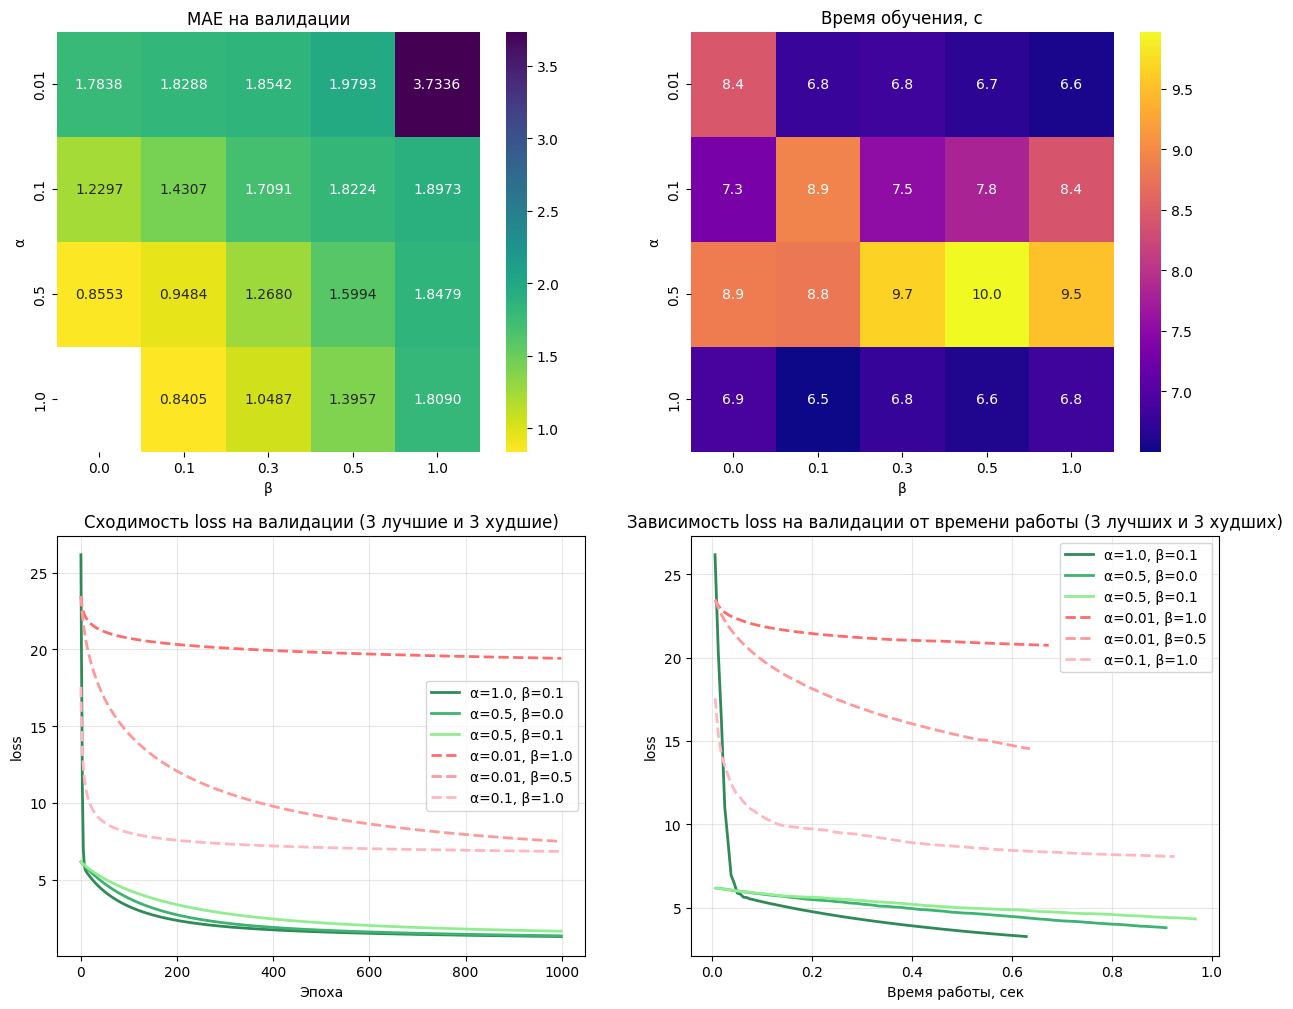

In [77]:
mae_table = results.pivot(index='alpha', columns='beta', values='mae_val')
time_table = results.pivot(index='alpha', columns='beta', values='train_time')

combined_table = pd.DataFrame()

for alpha in mae_table.index:
    for beta in mae_table.columns:
        mae_val = mae_table.loc[alpha, beta]
        time_val = time_table.loc[alpha, beta]
        combined_table.loc[alpha, beta] = f'{mae_val:.4f} ({time_val:.1f}s)'
        
print("\nФормат: MAE (Время обучения)")
print(combined_table.to_string())

print("\n Лучшая комбинация:")

print(f"   α={best_result['alpha']}, β={best_result['beta']}")
print(f"   MAE на трейне: {best_result['mae_train']:.4f}, MAE на валидации: {best_result['mae_val']:.4f}")
print(f"   Время: {best_result['train_time']:.2f}s, Эпохи: {best_result['n_epochs']}")

print(f"Диапазон Val MAE: {results['mae_val'].min():.4f} - {results['mae_val'].max():.4f}")
print(f"Среднее время: {results['train_time'].mean():.2f}s")
print(f"Среднее число эпох: {results['n_epochs'].mean():.0f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

plt.subplot(2, 2, 1)
pivot_mae = results.pivot(index='alpha', columns='beta', values='mae_val')

mask = np.zeros_like(pivot_mae, dtype=bool)
if 1.0 in pivot_mae.index and 0.0 in pivot_mae.columns:
    alpha_idx = list(pivot_mae.index).index(1.0)
    beta_idx = list(pivot_mae.columns).index(0.0)
    mask[alpha_idx, beta_idx] = True

sns.heatmap(pivot_mae, annot=True, fmt='.4f', cmap='viridis_r', mask=mask)
plt.title('MAE на валидации')
plt.xlabel('β')
plt.ylabel('α')

plt.subplot(2, 2, 2)

pivot_time = results.pivot(index='alpha', columns='beta', values='train_time')
sns.heatmap(pivot_time, annot=True, fmt='.1f', cmap='plasma')
plt.title('Время обучения, с')
plt.xlabel('β')
plt.ylabel('α')

plt.subplot(2, 2, 3)

colors_best = ['#2E8B57', '#3CB371', '#90EE90']
colors_worst = ['#FF6B6B', '#FF9999', '#FFB6C1']

for i, (idx, row) in enumerate(best_combinations.iterrows()):
    if row['history'] and 'func_val' in row['history']:
        plt.plot(row['history']['func_val'], 
                label=f'α={row["alpha"]}, β={row["beta"]}',
                linewidth=2,
                linestyle='-',
                color=colors_best[i])

worst_combinations = results.nlargest(4, 'mae_val')
worst_combinations = worst_combinations.iloc[1:]

for i, (idx, row) in enumerate(worst_combinations.iterrows()):
    if row['history'] and 'func_val' in row['history']:
        plt.plot(row['history']['func_val'], 
                label=f'α={row["alpha"]}, β={row["beta"]}',
                linewidth=2,
                linestyle='--',
                color=colors_worst[i])

plt.xlabel('Эпоха')
plt.ylabel('loss')
plt.title('Сходимость loss на валидации (3 лучшие и 3 худшие)')
plt.legend()
plt.grid(True, alpha=0.3)


plt.subplot(2, 2, 4)

for i, (idx, row) in enumerate(best_combinations.iterrows()):
    if row['history'] and 'func_val' in row['history'] and 'time' in row['history']:
        cumulative_time = np.cumsum(row['history']['time'])[:100]
        val_loss = row['history']['func_val'][:100]
        plt.plot(cumulative_time, val_loss, 
                label=f'α={row["alpha"]}, β={row["beta"]} ',
                linewidth=2,
                linestyle='-',
                color=colors_best[i])

worst_combinations = results.nlargest(4, 'mae_val')
worst_combinations = worst_combinations.iloc[1:]

for i, (idx, row) in enumerate(worst_combinations.iterrows()):
    if row['history'] and 'func_val' in row['history'] and 'time' in row['history']:
        cumulative_time = np.cumsum(row['history']['time'])[:100]
        val_loss = row['history']['func_val'][:100]
        plt.plot(cumulative_time, val_loss, 
                label=f'α={row["alpha"]}, β={row["beta"]}',
                linewidth=2,
                linestyle='--',
                color=colors_worst[i])

plt.xlabel('Время работы, сек')
plt.ylabel('loss')
plt.title('Зависимость loss на валидации от времени работы (3 лучших и 3 худших)')
plt.legend()
plt.grid(True, alpha=0.3)

По построенной визуализации можно сказать, что при фиксированном $\alpha$ и уменшении $\beta$ и при фиксированном $\beta$ и увеличении $\alpha$ значение MAE монотонно уменьшается, а наилучшей комбинацией получилась $\alpha = 1, \beta = 0.1$. При этом на паре (1, 0) MAE получилось огромным (пришлось не включать его на все графики, так как иначе искажался бы масштаб), но это можно объяснить, так как шаг получился просто равным 1, то есть вычитался просто градиент, который оказывался слишком большим, что и привело к такой плохой сходимости.

Также на графиках с лучшим и худшим результатом сходимости можно увидеть отмеченную ранее зависимость скорости сходимости от значения параметров.

**5.** (3 points)
- Исследуйте поведение стохастического градиентного спуска для задачи линейной регрессии в зависимости от следующих параметров:
  - параметр темпа обучения ``step_alpha``
  - параметр темпа обучения ``step_beta``
  - размер подвыборки ``batch_size``

Замечание. Обратите внимание, что в стохастическом случае необходимо строить зависимости метрик качества от эпохи метода. За одну эпоху через оптимизацию модели проходит $N$ объектов, где $N$ — длина обучающей выборки. Если вы реализуете семплирование согласно спецификации задания, то за одну эпоху каждый объект пройдёт через оптимизацию ровно один раз. В полном градиентном спуске одна эпоха метода соответствует одной итерации обучения.

***Дисклеймер:*** *это исследовательская часть задания, где вы сами решаете, как много экспериментов проводить, как ограничить пространство поиска и прочие параметры. Оценка качества экспериментов будет основана на субъективных ощущениях проверяющего. Таким образом моделируется реальное исследование, когда вы в большинстве случаев не можете оценить, в какой области находится достаточно хорошее решение и сколько потребуется экспериментов для его достижения.*

**6.** (2 point) Сравните поведение двух методов между собой, сделайте выводы. Сравните оптимальные ``step_alpha`` и ``step_beta`` для разных методов.

**7.** (1 point) Подберите по отложенной выборке коэффициент $l2$-регуляризации модели.

**8.** (2 points) Выберите лучший алгоритм для тестовой выборки. Проанализируйте ошибки алгоритма. Проанализируйте и укажите общие черты объектов, на которых были допущены ошибки.